# Data Manipulation and Correlations


Notebook created for Regression in Psychology [PSYCH–GA.2229](https://docs.google.com/document/d/10AW7g92O6BtX61kXVIkHtL4j_k3P_G5f/edit?usp=sharing&ouid=100340169590558171318&rtpof=true&sd=true) graduate level course at New York University by [Dr. Madalina Vlasceanu](https://www.mvlasceanu.com/)

This content is Open Access (free access to information and unrestricted use of electronic resources for everyone).

Sources:
- Navarro, D. (2013). Learning statistics with R: https://learningstatisticswithr.com/
- Gureckis, 2018
https://teaching.gureckislab.org/fall22/labincp/intro.html

In [1]:
# testing

In [2]:
# import libraries

import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# import data downloaded from https://github.com/mvlasceanu/RegressionData/blob/main/data.xlsx
#df = pd.read_excel('data.xlsx')

# Or you can read the Excel file directly from the URL
url = 'https://github.com/mvlasceanu/RegressionData/raw/main/data.xlsx'
df = pd.read_excel(url)

df.head(2)

,Response ID,GENDER,AGE,PARTY,TWITTER,TRUST,RU1,RU2,RU3,RU4,...,Post23,Post24,Post25,Post26,Post27,Post28,Post29,Post30,Post31,Post32
0,R_0cj5dsJg2wfpiuJ,1,18,1,0,95,4.0,26,0,-5,...,69,60,20,58,84,22,42,77,90,71
1,R_0rkhLjwWPHHjnTX,0,19,2,1,76,-5.0,16,3,-1,...,58,82,38,61,36,40,62,68,46,43


## Wide to long transformations

In [4]:
# transform the datafram from wide format to long format using Panda's wide_to_long function

df_long = pd.wide_to_long(df.reset_index(), stubnames=['RU', 'Pre'], i=['Response ID','GENDER'], j='Item').reset_index()
df_long

,Response ID,GENDER,Item,Post1,Post16,Post17,Post15,Post5,Post22,Post6,...,Post10,Post11,Post9,Post23,Post18,TWITTER,PARTY,Post7,RU,Pre
0,R_0cj5dsJg2wfpiuJ,1,1,87.0,23,64,57,90,57,29,...,10,31,28,69,55,0,1,61,4.0,83
1,R_0cj5dsJg2wfpiuJ,1,2,87.0,23,64,57,90,57,29,...,10,31,28,69,55,0,1,61,26.0,64
2,R_0cj5dsJg2wfpiuJ,1,3,87.0,23,64,57,90,57,29,...,10,31,28,69,55,0,1,61,0.0,20
3,R_0cj5dsJg2wfpiuJ,1,4,87.0,23,64,57,90,57,29,...,10,31,28,69,55,0,1,61,-5.0,30
4,R_0cj5dsJg2wfpiuJ,1,5,87.0,23,64,57,90,57,29,...,10,31,28,69,55,0,1,61,4.0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,R_ZpYHWVd91u6fjBT,0,28,69.0,56,65,17,61,62,44,...,62,33,59,56,38,0,1,68,23.0,32
6396,R_ZpYHWVd91u6fjBT,0,29,69.0,56,65,17,61,62,44,...,62,33,59,56,38,0,1,68,-24.0,0
6397,R_ZpYHWVd91u6fjBT,0,30,69.0,56,65,17,61,62,44,...,62,33,59,56,38,0,1,68,-20.0,17
6398,R_ZpYHWVd91u6fjBT,0,31,69.0,56,65,17,61,62,44,...,62,33,59,56,38,0,1,68,36.0,69


In [5]:
#transform the datafram from wide format to long format using Panda's melt function

df_long_2 = pd.melt(
    df.loc[:, ['Response ID', "GENDER", "AGE", "PARTY", "TWITTER", "TRUST", "RU1",'RU2', 'RU3', 'RU4']],
    id_vars=['Response ID', "GENDER", "AGE", "PARTY", "TWITTER", "TRUST"],
    var_name="Item",
    value_name="RU"
)
df_long_2

,Response ID,GENDER,AGE,PARTY,TWITTER,TRUST,Item,RU
0,R_0cj5dsJg2wfpiuJ,1,18,1,0,95,RU1,4.0
1,R_0rkhLjwWPHHjnTX,0,19,2,1,76,RU1,-5.0
2,R_10BMNpjhInMfUeO,1,18,1,1,86,RU1,-5.0
3,R_120iGR6WlLnbZnI,0,22,1,0,95,RU1,23.0
4,R_12qW8cDY0bNlId2,0,19,3,0,76,RU1,18.0
...,...,...,...,...,...,...,...,...
795,R_xapQxguTwA3Juh3,1,18,1,0,76,RU4,-32.0
796,R_XMS13V10vkvYag9,1,18,3,0,76,RU4,-4.0
797,R_ykkxJ7f40bzTEaZ,1,19,1,0,89,RU4,-13.0
798,R_ZDXFN47SOcbCJpv,0,21,2,0,100,RU4,5.0


## Selecting subsets of your dataframe

In [6]:
# select only women

df.query('GENDER==1')

,Response ID,GENDER,AGE,PARTY,TWITTER,TRUST,RU1,RU2,RU3,RU4,...,Post23,Post24,Post25,Post26,Post27,Post28,Post29,Post30,Post31,Post32
0,R_0cj5dsJg2wfpiuJ,1,18,1,0,95,4.0,26,0,-5,...,69,60,20,58,84,22,42,77,90,71
2,R_10BMNpjhInMfUeO,1,18,1,1,86,-5.0,-2,5,5,...,35,46,39,65,44,42,53,55,45,35
5,R_1BoktAHwyuomyCl,1,20,3,0,41,-4.0,-16,-4,-6,...,59,30,28,59,30,13,63,72,39,33
7,R_1Cmg1E3Fn2Evh4J,1,19,1,0,96,12.0,12,27,5,...,26,7,35,69,59,14,41,66,57,24
9,R_1etaEYMiW0ydSuF,1,18,1,0,100,-1.0,-2,-12,21,...,25,70,28,50,24,12,71,74,45,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,R_wTYaq1bnIPk7pIJ,1,19,3,0,90,-3.0,1,1,8,...,50,71,43,82,73,27,18,26,93,22
194,R_wZ3U1Md90MfZpa9,1,19,1,1,90,6.0,2,31,1,...,55,56,29,70,40,31,60,55,57,44
195,R_xapQxguTwA3Juh3,1,18,1,0,76,-13.0,3,3,-32,...,56,69,2,68,68,61,71,17,82,27
196,R_XMS13V10vkvYag9,1,18,3,0,76,-12.0,5,-7,-4,...,44,44,26,40,34,37,35,65,44,35


In [7]:
# select only women's trust in science

df.query('GENDER==1')['TRUST']

0       95
2       86
5       41
7       96
9      100
      ... 
193     90
194     90
195     76
196     76
197     89
Name: TRUST, Length: 129, dtype: int64

In [8]:
# select only women's under 50 trust in science

df.query('GENDER==1 & AGE<50')['TRUST']

0       95
2       86
5       41
7       96
9      100
      ... 
193     90
194     90
195     76
196     76
197     89
Name: TRUST, Length: 129, dtype: int64

In [9]:
# select only women's trust in science and assign it to a new variable

womenTRUST = df.query('GENDER==1')['TRUST']

In [10]:
# select only men's trust in science and assign it to a new variable

menTRUST = df.query('GENDER==0')['TRUST']

## Correlations

In [11]:
# corelate trust in science with age
# Run a Pearson Correlation for continuous variables

stats.pearsonr(df.AGE, df.TRUST)

PearsonRResult(statistic=0.012687557785958276, pvalue=0.8584782150756923)

In [12]:
# Run a Spearman Correlation for rank variables
stats.spearmanr(df.AGE, df.TRUST)

SignificanceResult(statistic=0.0248282977917326, pvalue=0.7271057552670346)

## Plots

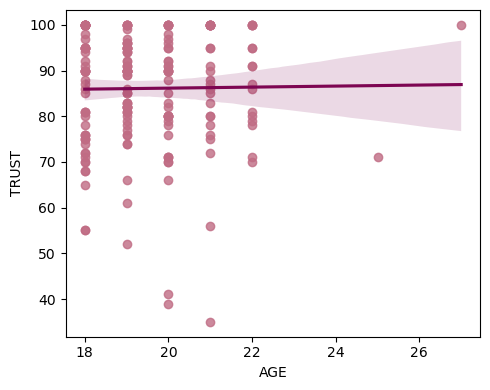

In [13]:
# Make a simple regression plot

# Create the figure
fig, ax = plt.subplots(1,1, figsize=(5,4))

# Plot the line
sns.regplot(x=df.AGE, y=df.TRUST, scatter_kws={"color": "#C06C84"}, line_kws={"color":"#7D0552"}, ax=ax)

# Include this command such that all the elements of the plot appear in the figure
plt.tight_layout()

# Save figure
plt.savefig('figure.tif', dpi=300, format="tiff")

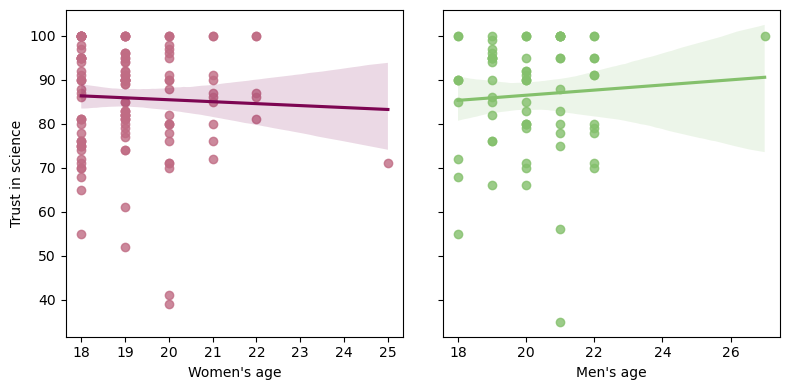

In [14]:
# Create the figure with 2 panels that share the y axis
fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)

# Plot the line of women's age against their trust in science
sns.regplot(x=df.query('GENDER==1')['AGE'], y=df.query('GENDER==1')['TRUST'], scatter_kws={"color": "#C06C84"}, line_kws={"color":"#7D0552"}, ax=ax[0])

# Plot the line of men's age against their trust in science
sns.regplot(x=df.query('GENDER==0')['AGE'], y=df.query('GENDER==0')['TRUST'], scatter_kws={"color": "#84C06C"}, line_kws={"color":"#84C06C"}, ax=ax[1])

# label the x axis
ax[0].set_xlabel("Women's age")
ax[1].set_xlabel("Men's age")

# label the y axis
ax[0].set_ylabel("Trust in science")
ax[1].set_ylabel(" ")

# Include this command such that all the elements of the plot appear in the figure
plt.tight_layout()

# Save figure
plt.savefig('figure.tif', dpi=300, format="tiff")

Let's recreate the figure above but remove the scatter dots

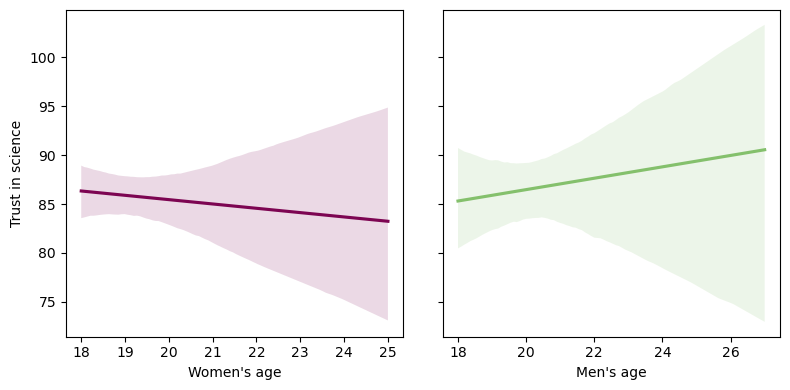

In [15]:
# Create the figure with 2 panels that share the y axis
fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)

# Plot the line of women's age against their trust in science
sns.regplot(x=df.query('GENDER==1')['AGE'], y=df.query('GENDER==1')['TRUST'], scatter=False, line_kws={"color":"#7D0552"}, ax=ax[0])

# Plot the line of men's age against their trust in science
sns.regplot(x=df.query('GENDER==0')['AGE'], y=df.query('GENDER==0')['TRUST'], scatter=False, line_kws={"color":"#84C06C"}, ax=ax[1])

# label the x axis
ax[0].set_xlabel("Women's age")
ax[1].set_xlabel("Men's age")

# label the y axis
ax[0].set_ylabel("Trust in science")
ax[1].set_ylabel(" ")

# Include this command such that all the elements of the plot appear in the figure
plt.tight_layout()

# Save figure
plt.savefig('figure.tif', dpi=300, format="tiff")